Top 10 Best-Selling Products:
 product_name
Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black)                                                                                                   623920.0
OnePlus 163.8 cm (65 inches) U Series 4K LED Smart Android TV 65U1S (Black)                                                                                                        495992.0
LG 139 cm (55 inches) 4K Ultra HD Smart LED TV 55UQ7500PSF (Ceramic Black)                                                                                                         383920.0
Samsung 138 cm (55 inches) Crystal 4K Neo Series Ultra HD Smart LED TV UA55AUE65AKXXL (Black)                                                                                      383920.0
MI 138.8 cm (55 inches) 5X Series 4K Ultra HD LED Smart Android TV L55M6-ES (Grey)                                                                                                 375992.0
Samsung 138 cm (

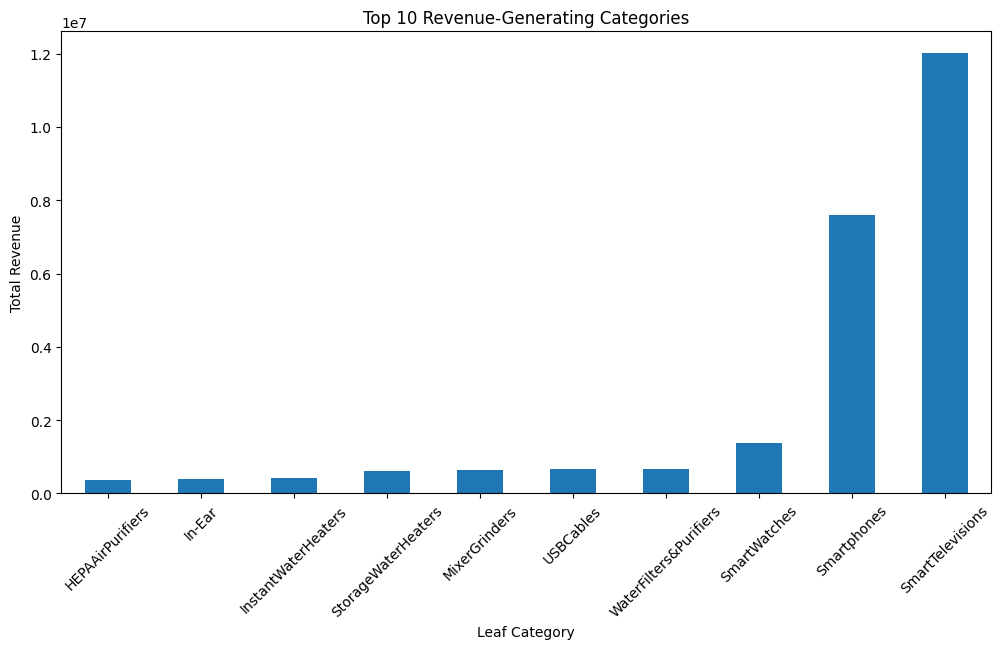

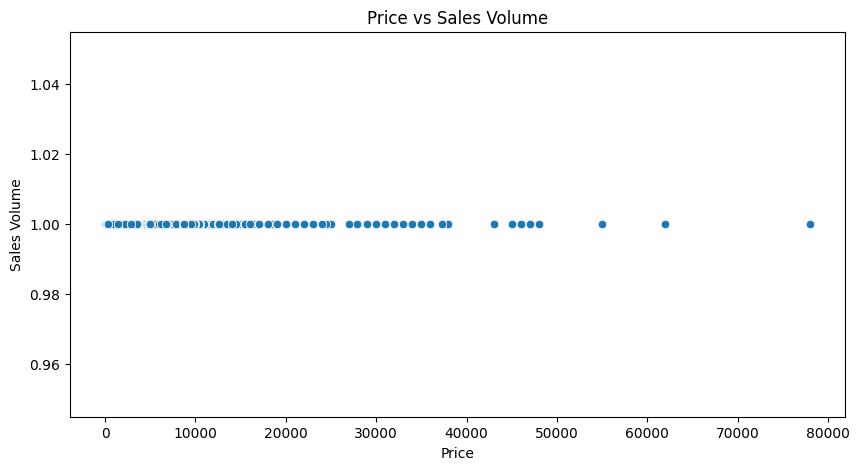

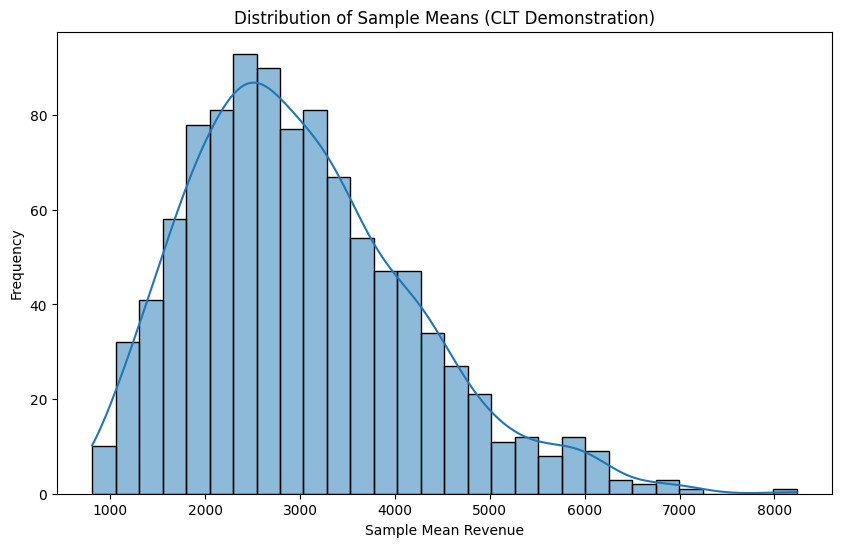

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

file_path = r"C:\Users\AKASH KRITHIK\Desktop\Amazon Sales Data Analysis\cleaned_amazon_data.csv"
df = pd.read_csv(file_path)

# Convert price-related columns to numeric
df['discounted_price'] = df['discounted_price'].astype(str).str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace(',', '').astype(float)

# Check if 'quantity' column exists, otherwise assume quantity = 1 (if missing)
if 'quantity' not in df.columns:
    df['quantity'] = 1  

# Create revenue column
df['revenue'] = df['discounted_price'] * df['quantity']

# Convert 'order_date' to datetime format if it exists
if 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

    # Extract Date Features
    df['year'] = df['order_date'].dt.year
    df['month'] = df['order_date'].dt.month
    df['day'] = df['order_date'].dt.day
    df['weekday'] = df['order_date'].dt.weekday
    df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Encode categorical variables
if 'category' in df.columns:
    le = LabelEncoder()
    df['category_encoded'] = le.fit_transform(df['category'])

### **3. Exploratory Data Analysis (EDA)** ###
# Top 10 Best-Selling Products
top_products = df.groupby('product_name')['revenue'].sum().nlargest(10)
print("Top 10 Best-Selling Products:\n", top_products)

# Sales Trend Over Time
if 'order_date' in df.columns:
    sales_trend = df.groupby('order_date')['revenue'].sum()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=sales_trend.index, y=sales_trend.values)
    plt.title('Sales Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.show()

# Revenue Contribution of Top 10 Products
total_revenue = df['revenue'].sum()
print("\nTop 10 Products Revenue Contribution: ")
print((top_products / total_revenue) * 100)

# Sales Comparison: Weekday vs. Weekend
if 'is_weekend' in df.columns:
    sales_by_day = df.groupby('is_weekend')['revenue'].sum()
    sns.barplot(x=['Weekday', 'Weekend'], y=sales_by_day.values)
    plt.title('Sales Comparison: Weekday vs Weekend')
    plt.ylabel('Revenue')
    plt.show()
print(df.columns)
# Category-wise Sales
if 'leaf_category' in df.columns:
    top_categories = df.groupby('leaf_category')['revenue'].sum().nlargest(10)  # Get top 10 categories
    top_categories.sort_values().plot(kind='bar', figsize=(12, 6))  # Sort for better visualization
    plt.title('Top 10 Revenue-Generating Categories')
    plt.ylabel('Total Revenue')
    plt.xlabel('Leaf Category')
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.show()


### **4. Price Impact on Sales** ###
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['discounted_price'], y=df['quantity'])
plt.title('Price vs Sales Volume')
plt.xlabel('Price')
plt.ylabel('Sales Volume')
plt.show()

### **5. Customer Segmentation** ###
if 'customer_id' in df.columns:
    customer_revenue = df.groupby('customer_id')['revenue'].sum()
    sns.histplot(customer_revenue, bins=30, kde=True)
    plt.title('Customer Revenue Distribution')
    plt.xlabel('Revenue per Customer')
    plt.show()

### Central Limit Theorem (CLT) Demonstration ###
sample_means = []
sample_size = 30
n_samples = 1000
for _ in range(n_samples):
    sample = df['revenue'].sample(sample_size, replace=True)
    sample_means.append(sample.mean())

# Plotting CLT Distribution
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True)
plt.title("Distribution of Sample Means (CLT Demonstration)")
plt.xlabel("Sample Mean Revenue")
plt.ylabel("Frequency")
plt.show()
